In [1]:
!pip install wandb


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import wandb

In [3]:

wandb.login(key="04125782ac3fe634f6197dcacacf52ddf7331c58")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cheatcode046 (cheatcode046-null). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\PC\_netrc


True

In [4]:

wandb.login()

True

In [5]:

wandb.init(project="Phishing Detection", name=" url_classification")

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io

In [8]:
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'MacRoman']
successful = False

for encoding in encodings:
    try:
        data = pd.read_csv(r"C:\Users\PC\Documents\MLCodes\urlset.csv", encoding=encoding, on_bad_lines='skip')
        successful = True
        print(f"Successfully read the CSV file with encoding: {encoding}")
        break
    except (UnicodeDecodeError, pd.errors.ParserError) as e:
        print(f"Failed with encoding: {encoding} - {e}")
        continue

if not successful:
    print("Failed to read the CSV file with any of the specified encodings.")

# If successful, display the first few rows of the DataFrame
if successful:
    print(data.head())


Failed with encoding: utf-8 - 'utf-8' codec can't decode byte 0xad in position 73: invalid start byte
Successfully read the CSV file with encoding: latin1
                                              domain   ranking mld_res  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000     1.0   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000     0.0   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000     0.0   
3  mail.printakid.com/www.online.americanexpress....  10000000     0.0   
4  thewhiskeydregs.com/wp-content/themes/widescre...  10000000     0.0   

  mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0        0.0      18.0  107.611111  107.277778         0.0         0.0   
1        0.0      11.0  150.636364  152.272727         0.0         0.0   
2        0.0      14.0   73.500000   72.642857         0.0         0.0   
3        0.0       6.0  562.000000  590.666667         0.0         0.0   
4        0.0       8.0   29.00

C:\Users\PC\AppData\Local\Temp\ipykernel_10972\3038593440.py:6: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\PC\Documents\MLCodes\urlset.csv", encoding=encoding, on_bad_lines='skip')


In [9]:
data.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1.0


In [10]:
data.shape

(96005, 14)

In [11]:
data.tail(10)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
95995,www.1up.com/do/gameOverview?cId=3159391,11106,1.0,1.0,4.0,277.25,289.250000,0.002681,0.003431,0.002691,0.003442,0.692308,0.802705,0.0
95996,psx.ign.com/articles/131/131835p1.html,339,1.0,1.0,2.0,152.00,151.000000,0.002825,0.002841,0.000000,0.000000,0.45098,0.830816,0.0
95997,wii.gamespy.com/wii/cursed-mountain/,11812,1.0,1.0,2.0,47.00,49.000000,0.017857,0.017241,0.000000,0.000000,0.55,0.811321,0.0
95998,wii.ign.com/objects/142/14270799.html,339,1.0,1.0,2.0,142.50,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
95999,xbox360.gamespy.com/xbox-360/dead-space/,11812,1.0,1.0,3.0,114.00,128.333333,0.019718,0.020151,0.011461,0.012788,0.55,0.714623,0.0
96000,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.50,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.00,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.00,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.00,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0
96004,www.angelfire.com/goth/devilmaycrytonite/,2547,1.0,1.0,5.0,32.40,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157,0.0


In [12]:
data.isnull().sum()

domain            0
ranking          52
mld_res          70
mld.ps_res       81
card_rem         82
ratio_Rrem       82
ratio_Arem       82
jaccard_RR       83
jaccard_RA       84
jaccard_AR       85
jaccard_AA       86
jaccard_ARrd     86
jaccard_ARrem    88
label            92
dtype: int64

In [15]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 272.3 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 435.7 kB/s eta 0:00:01
   ----------------- -------------------- 133.1/294.9 kB 314.3 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 533.8 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 533.8 kB/s eta 0:00:01
 

In [16]:
import seaborn as sns

<Axes: >

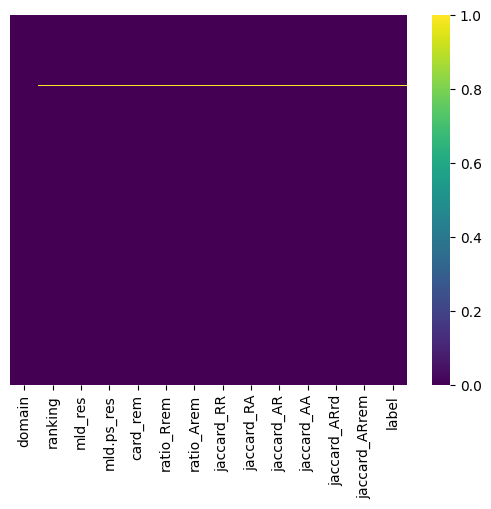

In [17]:
sns.heatmap(data.isnull(),yticklabels = False, cbar =True, cmap = 'viridis')

In [18]:
data = data.drop(columns=['domain'])

In [19]:
numeric = data.apply(pd.to_numeric, errors='coerce')

In [20]:
def fill_ranking(cols):
    ranking = cols[0]
    if pd.isnull(ranking):
        return 10000000
    else:
        return ranking

def fill_mld_res(cols):
    mld_res = cols[0]
    if pd.isnull(mld_res):
        return 0
    else:
        return mld_res

def fill_mld_ps_res(cols):
    mld_ps_res = cols[0]
    if pd.isnull(mld_ps_res):
        return 0
    else:
        return mld_ps_res

def fill_card_rem(cols):
    card_rem = cols[0]
    if pd.isnull(card_rem):
        return 6
    else:
        return card_rem

def fill_ratio_Rrem(cols):
    ratio_Rrem = cols[0]
    if pd.isnull(ratio_Rrem):
        return 152.674
    else:
        return ratio_Rrem

def fill_ratio_Arem(cols):
    ratio_Arem = cols[0]
    if pd.isnull(ratio_Arem):
        return 82
    else:
        return ratio_Arem

def fill_jaccard_RR(cols):
    jaccard_RR = cols[0]
    if pd.isnull(jaccard_RR):
        return 0
    else:
        return jaccard_RR

def fill_jaccard_RA(cols):
    jaccard_RA = cols[0]
    if pd.isnull(jaccard_RA):
        return 0
    else:
        return jaccard_RA

def fill_jaccard_AR(cols):
    jaccard_AR = cols[0]
    if pd.isnull(jaccard_AR):
        return 0
    else:
        return jaccard_AR

def fill_jaccard_AA(cols):
    jaccard_AA = cols[0]
    if pd.isnull(jaccard_AA):
        return 0
    else:
        return jaccard_AA

def fill_jaccard_ARrd(cols):
    jaccard_ARrd = cols[0]
    if pd.isnull(jaccard_ARrd):
        return 0
    else:
        return jaccard_ARrd

def fill_jaccard_ARrem(cols):
    jaccard_ARrem = cols[0]
    if pd.isnull(jaccard_ARrem):
        return 0.633333333
    else:
        return jaccard_ARrem

def fill_label(cols):
    label = cols[0]
    if pd.isnull(label):
        return 1
    else:
        return label

In [21]:
data['ranking'] = data[['ranking']].apply(fill_ranking, axis=1)
data['mld_res'] = data[['mld_res']].apply(fill_mld_res, axis=1)
data['mld.ps_res'] = data[['mld.ps_res']].apply(fill_mld_ps_res, axis=1)
data['card_rem'] = data[['card_rem']].apply(fill_card_rem, axis=1)
data['ratio_Rrem'] = data[['ratio_Rrem']].apply(fill_ratio_Rrem, axis=1)
data['ratio_Arem'] = data[['ratio_Arem']].apply(fill_ratio_Arem, axis=1)
data['jaccard_RR'] = data[['jaccard_RR']].apply(fill_jaccard_RR, axis=1)
data['jaccard_RA'] = data[['jaccard_RA']].apply(fill_jaccard_RA, axis=1)
data['jaccard_AR'] = data[['jaccard_AR']].apply(fill_jaccard_AR, axis=1)
data['jaccard_AA'] = data[['jaccard_AA']].apply(fill_jaccard_AA, axis=1)
data['jaccard_ARrd'] = data[['jaccard_ARrd']].apply(fill_jaccard_ARrd, axis=1)
data['jaccard_ARrem'] = data[['jaccard_ARrem']].apply(fill_jaccard_ARrem, axis=1)
data['label'] = data[['label']].apply(fill_label, axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_10972\2913115448.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ranking = cols[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_10972\2913115448.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mld_res = cols[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_10972\2913115448.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mld_ps_res = cols[0]
C:\Users\PC\AppData\Local\Temp\ipykernel_10972\2

<Axes: >

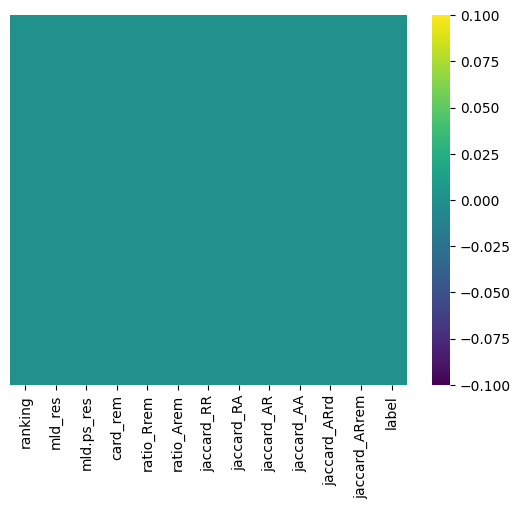

In [22]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [23]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.dropna(inplace=True)

LOGISTIC REGRESSION

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop('label', axis=1)

In [26]:
y = data['label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(76777, 12)

In [29]:
X_test.shape

(19195, 12)

In [30]:
y_train.shape

(76777,)

In [31]:
y_test.shape

(19195,)

In [32]:
X_train.head()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
88985,10000000.0,0.0,0.0,4.0,198.500000,211.000000,0.0,0.0,0.0,0.0,0.0,0.800000
8248,10000000.0,0.0,0.0,1.0,197.000000,213.000000,0.0,0.0,0.0,0.0,0.0,0.722689
86922,313605.0,0.0,0.0,1.0,14.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.454545
15342,10000000.0,0.0,0.0,12.0,136.750000,134.583333,0.0,0.0,0.0,0.0,0.0,0.771491
45499,10000000.0,0.0,0.0,11.0,82.272727,78.090909,0.0,0.0,0.0,0.0,0.0,0.697786


In [33]:
y_train.head()

88985    0.0
8248     1.0
86922    0.0
15342    1.0
45499    1.0
Name: label, dtype: float64

In [34]:
X_train.shape

(76777, 12)

In [35]:
X_train.columns

Index(['ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem'],
      dtype='object')

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel

LogisticRegression()

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76777 entries, 88985 to 15795
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ranking        76777 non-null  float64
 1   mld_res        76777 non-null  float64
 2   mld.ps_res     76777 non-null  float64
 3   card_rem       76777 non-null  float64
 4   ratio_Rrem     76777 non-null  float64
 5   ratio_Arem     76777 non-null  float64
 6   jaccard_RR     76777 non-null  float64
 7   jaccard_RA     76777 non-null  float64
 8   jaccard_AR     76777 non-null  float64
 9   jaccard_AA     76777 non-null  float64
 10  jaccard_ARrd   76777 non-null  float64
 11  jaccard_ARrem  76777 non-null  float64
dtypes: float64(12)
memory usage: 7.6 MB


In [40]:
logmodel.fit(X_train,y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
predictions

array([0., 1., 1., ..., 1., 0., 1.])

In [43]:
y_test

55858    0.0
85601    0.0
31000    1.0
62165    0.0
75067    0.0
        ... 
88214    0.0
24437    1.0
10123    1.0
56146    0.0
48438    0.0
Name: label, Length: 19195, dtype: float64

In [44]:
from sklearn.metrics import auc, accuracy_score, classification_report, log_loss, confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.45      0.57      9605
         1.0       0.61      0.86      0.71      9590

    accuracy                           0.66     19195
   macro avg       0.69      0.66      0.64     19195
weighted avg       0.69      0.66      0.64     19195



Axes(0.125,0.11;0.62x0.77)


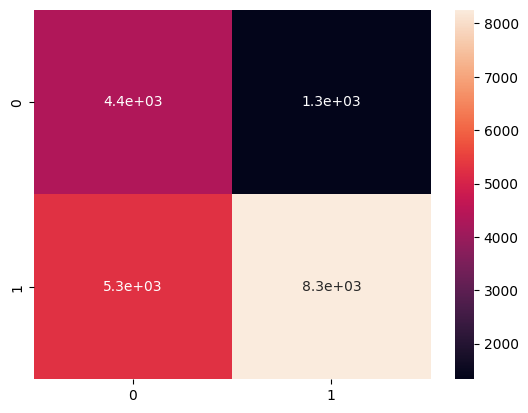

In [46]:
print(sns.heatmap(confusion_matrix(predictions, y_test), annot=True))

In [47]:
reg_accuracy= accuracy_score(y_test, predictions)

In [48]:
wandb.log({"accuracy": reg_accuracy})

In [49]:
print(f"The accuracy of Logistic Regression is : {reg_accuracy}")

The accuracy of Logistic Regression is : 0.6567856212555353


DECISION TREE

In [50]:
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'MacRoman']
successful = False

for encoding in encodings:
    try:
        data = pd.read_csv(r"C:\Users\PC\Documents\MLCodes\urlset.csv", encoding=encoding, on_bad_lines='skip')
        successful = True
        print(f"Successfully read the CSV file with encoding: {encoding}")
        break
    except (UnicodeDecodeError, pd.errors.ParserError) as e:
        print(f"Failed with encoding: {encoding} - {e}")
        continue

if not successful:
    print("Failed to read the CSV file with any of the specified encodings.")

# If successful, display the first few rows of the DataFrame
if successful:
    print(data.head())


Failed with encoding: utf-8 - 'utf-8' codec can't decode byte 0xad in position 73: invalid start byte
Successfully read the CSV file with encoding: latin1
                                              domain   ranking mld_res  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000     1.0   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000     0.0   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000     0.0   
3  mail.printakid.com/www.online.americanexpress....  10000000     0.0   
4  thewhiskeydregs.com/wp-content/themes/widescre...  10000000     0.0   

  mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0        0.0      18.0  107.611111  107.277778         0.0         0.0   
1        0.0      11.0  150.636364  152.272727         0.0         0.0   
2        0.0      14.0   73.500000   72.642857         0.0         0.0   
3        0.0       6.0  562.000000  590.666667         0.0         0.0   
4        0.0       8.0   29.00

C:\Users\PC\AppData\Local\Temp\ipykernel_10972\3038593440.py:6: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\PC\Documents\MLCodes\urlset.csv", encoding=encoding, on_bad_lines='skip')


In [51]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [52]:
from sklearn import tree

In [53]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [54]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
clf=clf.fit(X,y)

In [56]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [72]:
dt_model= DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
dt_predictions=dt_model.predict(X_test)

In [74]:
dt_accuracy=accuracy_score(y_test,dt_predictions)

In [80]:
from sklearn.datasets import load_iris

In [81]:
data = load_iris()
X = data.data
y = data.target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
dt_predictions = dt_classifier.predict(X_test)

In [85]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
class_report = classification_report(y_test, dt_predictions, output_dict=True)

In [86]:
report_data = []
for label, metrics in class_report.items():
    if isinstance(metrics, dict):
        report_data.append([label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])

In [87]:
# Create a wandb Table
table = wandb.Table(columns=["Class", "Precision", "Recall", "F1-Score", "Support"], data=report_data)

In [88]:
# Log the table to wandb
wandb.log({"classification_report": table, "accuracy": dt_accuracy})

In [75]:
print("Decision Tree Results: ")
print(f"Accuracy:{dt_accuracy:.4f}")
print(classification_report(y_test,dt_predictions))

Decision Tree Results: 
Accuracy:0.9376
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      9605
         1.0       0.93      0.95      0.94      9590

    accuracy                           0.94     19195
   macro avg       0.94      0.94      0.94     19195
weighted avg       0.94      0.94      0.94     19195



COMPARING THE RESULTS

In [89]:
print("Performance Comparison: ")
print(f"Logistic Regression Accuracy: {reg_accuracy:.2f}")
print(f" Decision Tree Accuracy: {dt_accuracy:.2f}")

Performance Comparison: 
Logistic Regression Accuracy: 0.66
 Decision Tree Accuracy: 1.00


In [90]:
if reg_accuracy >dt_accuracy:
    print("Logistic Regression performed better.")
elif dt_accuracy > reg_accuracy:
    print(" Decision Tree performed better.")
else:
    print(" The performance of both models is the same.")    

 Decision Tree performed better.


In [91]:
#log comparison 
wandb.log({
    "The best model": "Logistic Regression" if reg_accuracy > dt_accuracy else "Decision Tree",
    "Difference in Accuracy": abs(reg_accuracy-dt_accuracy)
})

Difference in Accuracy,▁
accuracy,▁█
Difference in Accuracy,0.34321
The best model,Decision Tree
accuracy,1.0


![alt text](image-3.png)

![alt text](image.png)

![alt text](image-1.png)

![alt text](image-2.png)